In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import conrad
import cvxpy
import numpy as np
import matplotlib

from matplotlib import pyplot as plt
from conrad import Case, CasePlotter, D

In [12]:
# Define dimensions of problem
m_target = 100
m_oar = 400
m = m_target + m_oar
n = 200

# Structure labels
lab_tum = 0
lab_oar = 1

# Generate random beam matrix
A_target = 2 * np.random.rand(m_target, n)
A_oar = 0.5 * np.random.rand(m_oar, n)
A = np.vstack((A_target, A_oar))

label_order = [lab_tum, lab_oar]
voxel_labels = [lab_tum] * m_target + [lab_oar] * m_oar

In [4]:
# Prescription for each structure
rx = [{'label': lab_tum, 'name': 'tumor', 'is_target': True,  'dose': 1., 'constraints': None},
      {'label': lab_oar, 'name': 'oar',   'is_target': False, 'dose': 0., 'constraints': None}]

In [5]:
# Construct and solve case with no DVH constraints
cs = Case(A, voxel_labels, label_order, rx)
p = CasePlotter(cs)
cs.plan()

('running solver...',)

ECOS 2.0.4 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  +5.249e+01  +5.249e+01  +5e+02  6e-01  6e-02  1e+00  1e+00    ---    ---    1  1  - |  -  - 
 1  +5.025e+01  +5.194e+01  +1e+02  8e-02  7e-03  2e+00  3e-01  0.9890  3e-01   1  2  2 |  0  0
 2  +5.199e+01  +5.205e+01  +2e+01  7e-03  7e-04  7e-02  4e-02  0.8863  1e-02   1  2  2 |  0  0
 3  +5.248e+01  +5.249e+01  +2e+00  6e-04  5e-05  2e-02  6e-03  0.9188  7e-02   1  1  1 |  0  0
 4  +5.250e+01  +5.250e+01  +2e-02  6e-06  6e-07  2e-04  7e-05  0.9884  1e-04   1  1  1 |  0  0

OPTIMAL (within feastol=6.5e-06, reltol=4.2e-04, abstol=2.2e-02).
Runtime: 0.083361 seconds.

('status: optimal',)
('optimal value: -0.000171467930343',)


True

In [6]:
# Add DVH constraints and resolve case
cs.structures[lab_tum].constraints += D(30) < 1.05
cs.structures[lab_tum].constraints += D(80) > 0.8
cs.structures[lab_oar].constraints += D(50) < 0.5

('running solver...',)

ECOS 2.0.4 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  +5.090e+01  -6.378e+02  +5e+03  8e-01  1e+01  1e+00  3e+00    ---    ---    1  1  - |  -  - 
 1  +1.839e+02  -6.443e+04  +5e+03  6e+01  1e+03  3e+02  3e+00  0.1943  7e-01   1  0  1 |  0  0
 2  +3.012e+01  -2.886e+02  +4e+03  3e-01  6e+00  2e+01  3e+00  0.4706  8e-01   0  0  0 |  0  0
 3  +4.822e+01  -1.938e+01  +1e+03  5e-02  1e+00  3e+00  8e-01  0.7171  3e-02   0  0  0 |  0  0
 4  +5.143e+01  +3.952e+01  +4e+02  7e-03  2e-01  5e-01  3e-01  0.7978  1e-01   0  0  0 |  0  0
 5  +5.237e+01  +5.111e+01  +8e+01  7e-04  2e-02  2e-03  5e-02  0.8703  7e-02   1  0  0 |  0  0
 6  +5.252e+01  +5.240e+01  +8e+00  6e-05  2e-03  4e-04  5e-03  0.9039  6e-03   1  1  1 |  0  0
 7  +5.250e+01  +5.246e+01  +2e+00  2e-05  7e-04  2e-04  1e-03  0.9890  2e-01   1  1  1 |  0  0
 8  +5.250e+01  +5.250e

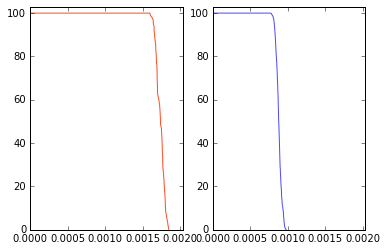

In [7]:
# Solve without slacks using a single pass
cs.plan(solver = "ECOS", dvh_slack = False)
p.plot(cs)

('running solver...',)

ECOS 2.0.4 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  +5.090e+01  -6.378e+02  +5e+03  8e-01  1e+01  1e+00  3e+00    ---    ---    1  1  - |  -  - 
 1  +1.839e+02  -6.443e+04  +5e+03  6e+01  1e+03  3e+02  3e+00  0.1943  7e-01   1  0  1 |  0  0
 2  +3.012e+01  -2.886e+02  +4e+03  3e-01  6e+00  2e+01  3e+00  0.4706  8e-01   0  0  0 |  0  0
 3  +4.822e+01  -1.938e+01  +1e+03  5e-02  1e+00  3e+00  8e-01  0.7171  3e-02   0  0  0 |  0  0
 4  +5.143e+01  +3.952e+01  +4e+02  7e-03  2e-01  5e-01  3e-01  0.7978  1e-01   0  0  0 |  0  0
 5  +5.237e+01  +5.111e+01  +8e+01  7e-04  2e-02  2e-03  5e-02  0.8703  7e-02   1  0  0 |  0  0
 6  +5.252e+01  +5.240e+01  +8e+00  6e-05  2e-03  4e-04  5e-03  0.9039  6e-03   1  1  1 |  0  0
 7  +5.250e+01  +5.246e+01  +2e+00  2e-05  7e-04  2e-04  1e-03  0.9890  2e-01   1  1  1 |  0  0
 8  +5.250e+01  +5.250e

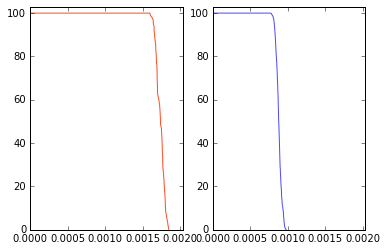

In [8]:
# Solve without slacks using 2 passes
cs.plan(solver = "ECOS", dvh_slack = False, dvh_exact = True)
p.plot(cs)

In [9]:
# Additional DVH constraint makes no-slack problem infeasible
cs.structures[lab_oar].constraints += D(55) > 0.1

In [10]:
# Solving without slacks will result in infeasibility
cs.plan(solver = "ECOS", dvh_slack = False)

('running solver...',)

ECOS 2.0.4 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  +4.875e+01  -6.963e+02  +1e+04  9e-01  2e+01  1e+00  5e+00    ---    ---    2  1  - |  -  - 
 1  +1.054e+03  -7.137e+04  +1e+04  7e+01  2e+03  2e+02  5e+00  0.1140  8e-01   1  0  1 |  0  0
 2  +1.054e+01  -3.253e+02  +1e+04  4e-01  8e+00  5e+01  5e+00  0.1478  9e-01   0  0  0 |  0  0
 3  +2.222e+01  -2.753e+02  +7e+03  3e-01  8e+00  6e+01  3e+00  0.6224  4e-01   1  0  0 |  0  0
 4  +4.367e+01  -1.347e+02  +4e+03  1e-01  5e+00  3e+01  2e+00  0.5015  2e-01   0  0  0 |  0  0
 5  +5.290e+01  -1.124e+01  +2e+03  4e-02  2e+00  5e+00  7e-01  0.6671  1e-01   0  0  0 |  0  0
 6  +5.256e+01  +1.892e+01  +1e+03  2e-02  9e-01  2e+00  5e-01  0.4858  2e-01   0  0  0 |  0  0
 7  +5.213e+01  +4.191e+01  +5e+02  6e-03  2e-01  2e-01  2e-01  0.8380  3e-01   0  0  0 |  0  0
 8  +5.221e+01  +5.079e

True

('running solver...',)

ECOS 2.0.4 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  +4.875e+01  -6.963e+02  +1e+04  9e-01  2e+01  1e+00  5e+00    ---    ---    2  1  - |  -  - 
 1  +1.054e+03  -7.137e+04  +1e+04  7e+01  2e+03  2e+02  5e+00  0.1140  8e-01   1  0  1 |  0  0
 2  +1.054e+01  -3.253e+02  +1e+04  4e-01  8e+00  5e+01  5e+00  0.1478  9e-01   0  0  0 |  0  0
 3  +2.222e+01  -2.753e+02  +7e+03  3e-01  8e+00  6e+01  3e+00  0.6224  4e-01   1  0  0 |  0  0
 4  +4.367e+01  -1.347e+02  +4e+03  1e-01  5e+00  3e+01  2e+00  0.5015  2e-01   0  0  0 |  0  0
 5  +5.290e+01  -1.124e+01  +2e+03  4e-02  2e+00  5e+00  7e-01  0.6671  1e-01   0  0  0 |  0  0
 6  +5.256e+01  +1.892e+01  +1e+03  2e-02  9e-01  2e+00  5e-01  0.4858  2e-01   0  0  0 |  0  0
 7  +5.213e+01  +4.191e+01  +5e+02  6e-03  2e-01  2e-01  2e-01  0.8380  3e-01   0  0  0 |  0  0
 8  +5.221e+01  +5.079e

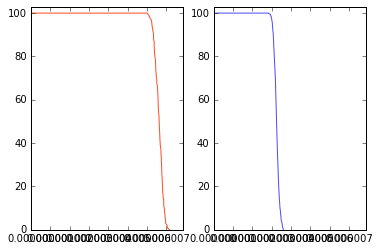

In [11]:
# Solve with slacks using 2 passes
cs.plan(solver = "ECOS", dvh_exact = True)
p.plot(cs)